# TASK 1 #

- Before starting, I first read all the resources and some extra videos for analysing data as the first task was related to that
- As our final task is to predict whether a student is in a relationship or not, I'll not consider relationship in the previous levels


## Level 1: Variable Identification Protocol ##

- Starting with identifying **Feature 1**, it ranges from 15 to 22, used value_counts for that and the frequency decreases in value as the value of feature 1 increases. So obviously, considering that it's a high school, my first guess would be that it's age.

Testing my hypothesis:

- out of the following metrics, I am choosing the metrics that would corelate with age to support my hypothesis: famsup, traveltime, failures, higher, goout, Dalc, absences, G1, G2, G3, Fedu, Medu, Pstatus. I'll only choose metrics which should have high correlation with age:
    - positive correlation {failures, Dalc, absences}
    - negative correlation {grades}

- So, I plotted the correlation matrix, and voila, there is a correlation. in fact there is a pretty strong correlation between feature 1 and failure, and some weak correlations for absences and Dalc. Also there is a *negative* correlation between f1 and grades. So I think we can confidently conclude that feature 1 is age

### Answer: Feature 1 is Age ### 

In [133]:
import pandas as pd
pd.set_option('display.max_columns', None) #as all the columns weren't displayed
data = pd.read_csv(r"C:\Users\Anay\Downloads\Dataset.csv") #have saved this locally
#data.tail()

<Axes: >

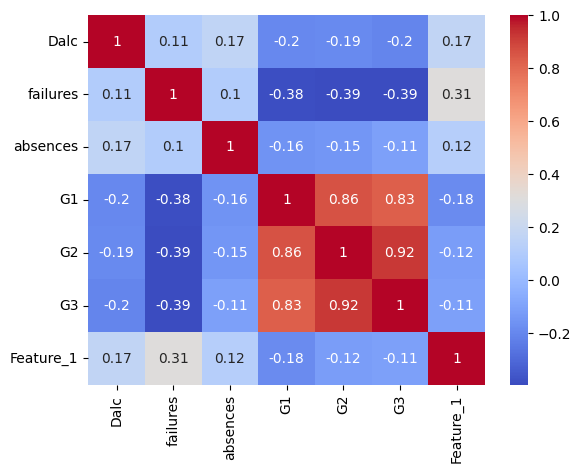

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
#print(data.head())
#print(data['Feature_1'].value_counts())
data_f1 = data[['Dalc', 'failures', 'absences','G1','G2','G3','Feature_1']].copy()
corr=data_f1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Before finding out feature 2, Let's draw the heatmap of correlation matrix between all data, as that would be useful for level 1 and other levels too!
But before drawing that, I converted all values to numerical values, so that it will be able to plot all values
(Label encoder encodes alphabatically and it encodes NA values too, so that's a fault but it won't matter for finding feature 1,2,3. So after cleaning the data I'll rerun this block to get more accurate results)

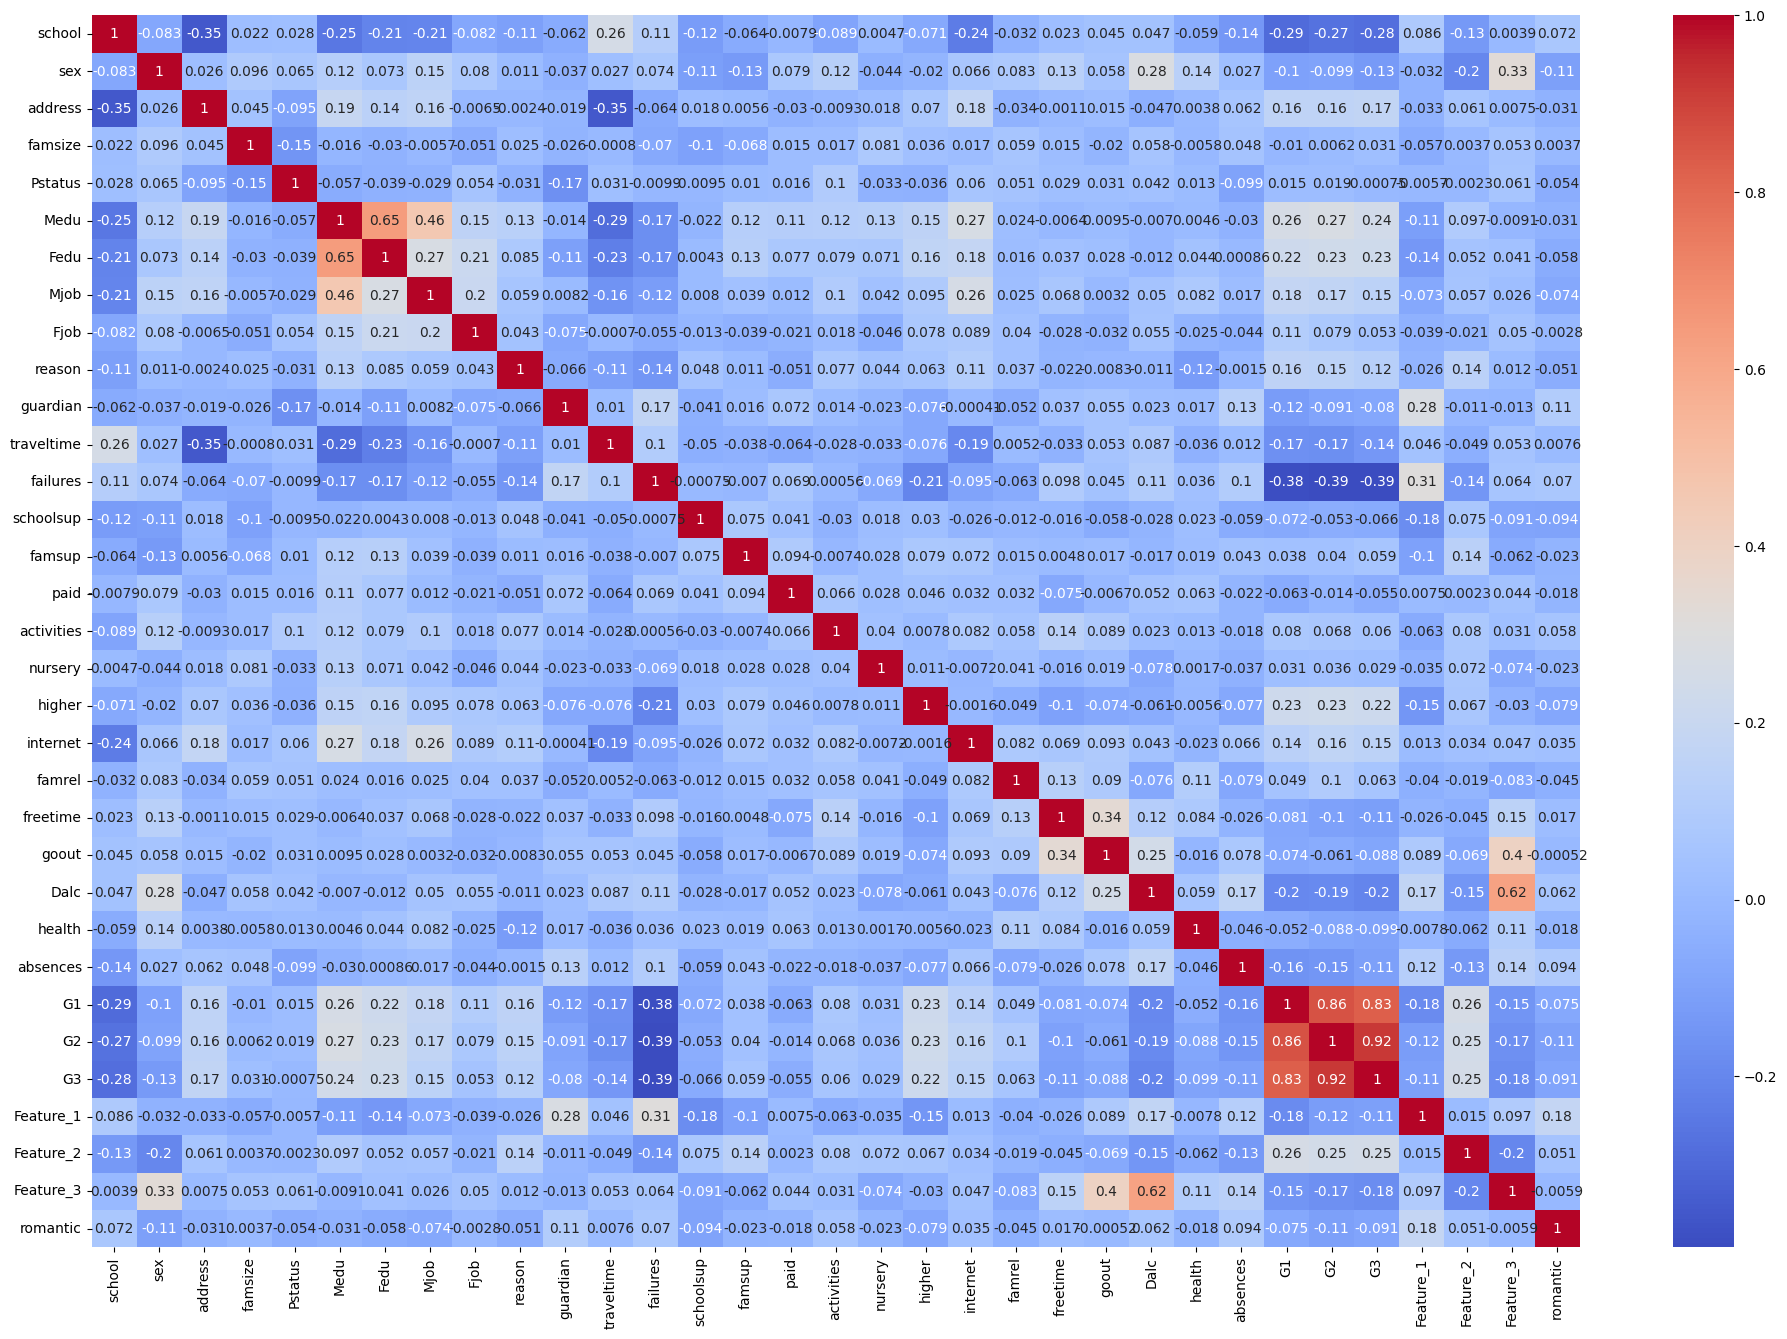

In [135]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
row_trans = [0,1,2,3,4,7,8,9,10,13,14,15,16,17,18,19,-1]
data_num=data.copy()
for i in row_trans:
    data_num.iloc[:,i] = le.fit_transform(data.iloc[:,i])
data_num.head()
corr1=data_num.corr()
plt.figure(figsize=(24, 16))
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.show()


### Feature 2: ###

This one was tricky:
-  as it only has a strongish/okayish/most correlation with grades and sex.
- And a positive correlation with grades, meaning it increases in size with grade and a negative correlation with sex, means it is higher for females. 
- But I think that it has a correlation with sex cause sex has a correlation with grades, so I'll only consider grades
-Also, as 2 has the most frequency, 2 would be the average/mode values for students and 3 and 4 are pretty rare
- Also noting down another point, these values are discreet and only contain {1,2,3,4}. 

To analyse more, i want to see the distribution of students with each grade, so plotted a boxplot as this should show the distribution. 

Feature_2
2.0    279
1.0    204
3.0     88
4.0     32
Name: count, dtype: int64


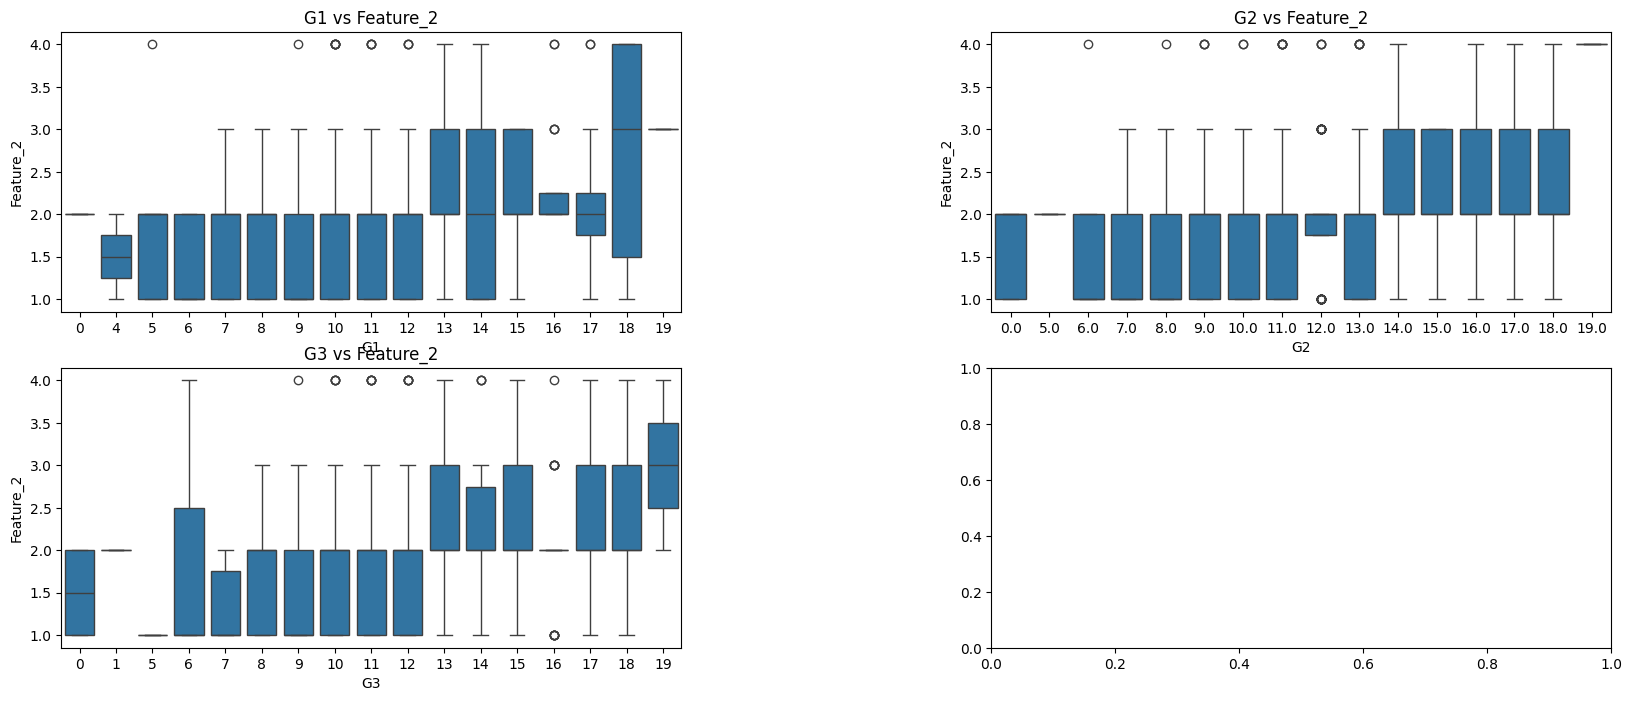

In [136]:
print(data_num['Feature_2'].value_counts())
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
plt.subplots_adjust(wspace=0.5) 
sns.boxplot(x='G1', y='Feature_2', data=data_num, ax=axs[0,0])
sns.boxplot(x='G2', y='Feature_2', data=data_num, ax=axs[0,1])
sns.boxplot(x='G3', y='Feature_2', data=data_num, ax=axs[1,0])
axs[0,0].set_title("G1 vs Feature_2")
axs[0,1].set_title("G2 vs Feature_2")
axs[1,0].set_title("G3 vs Feature_2")
plt.show()

Though I see a upward trend, feature 2 is generally higher for people with higher greades for G2 but still not sure. So, there might be variance on time too, between diff terms, so let's ignore G3 as it's the final grade, so maybe the average of the two.

In [137]:
"""plt.scatter(data['G2'], data['Feature_2'], alpha=0.4)
plt.scatter(data['G1'], data['Feature_2'], alpha=0.4)
plt.title('Scatter plot of G1, G2 and Feature_2')
plt.xlabel('G1, G2')
plt.ylabel('Feature_2')
plt.legend(['G1', 'G2'])
plt.grid()
plt.show()"""

"plt.scatter(data['G2'], data['Feature_2'], alpha=0.4)\nplt.scatter(data['G1'], data['Feature_2'], alpha=0.4)\nplt.title('Scatter plot of G1, G2 and Feature_2')\nplt.xlabel('G1, G2')\nplt.ylabel('Feature_2')\nplt.legend(['G1', 'G2'])\nplt.grid()\nplt.show()"

Tried drawing a scatter plot but it doesn't show anything. Now to get a clearer picture I want to know the average value of feature 2 for each value of each grade (yeah, a little confusing 😅, but what I mean is I want to see the relation between average value of feature 2 and grade)

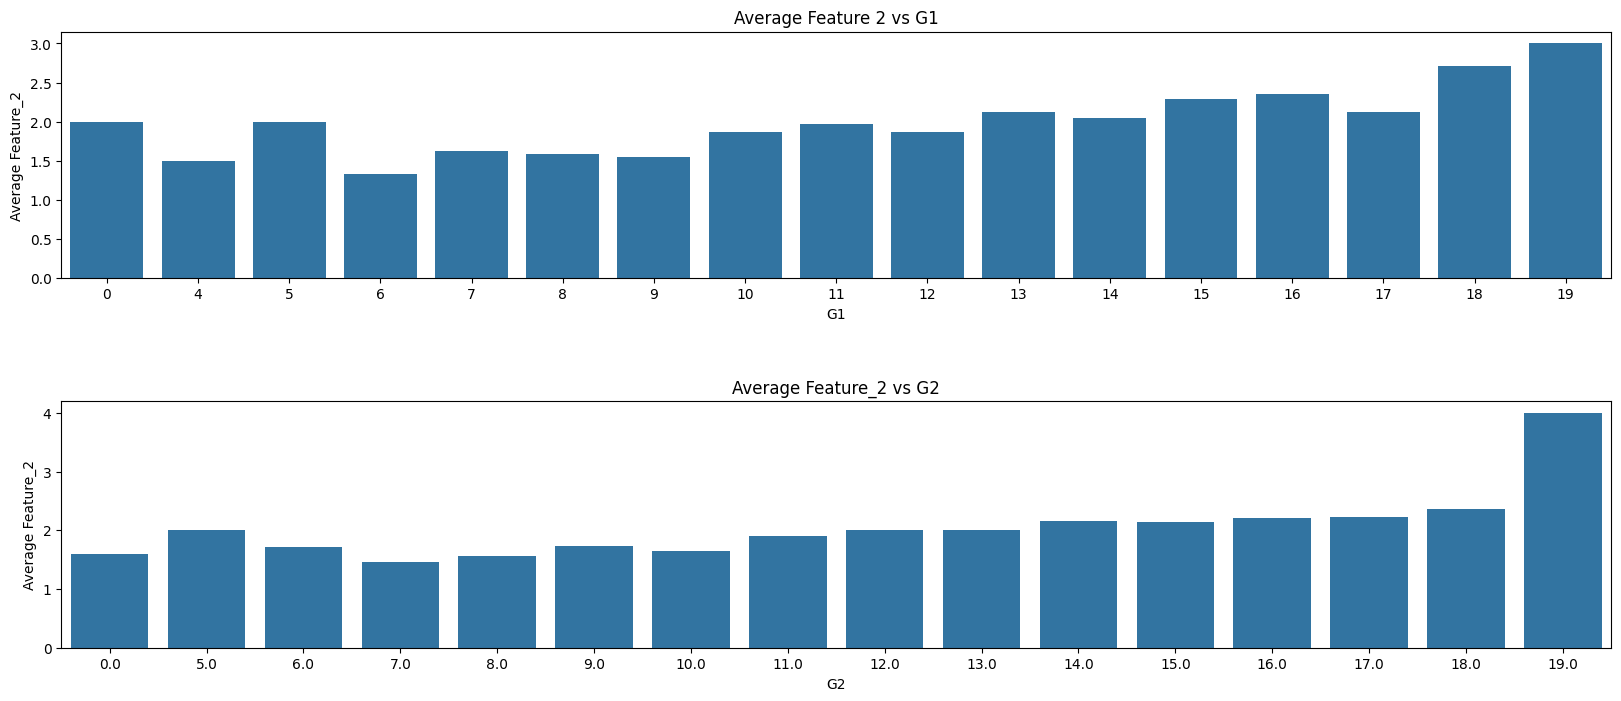

In [138]:
avgf2_for_g1 = data_num.groupby('G1')['Feature_2'].mean().reset_index()
avgf2_for_g2 = data_num.groupby('G2')['Feature_2'].mean().reset_index()

fig, axs = plt.subplots(2, 1, figsize=(20, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.barplot(x='G1', y='Feature_2', data=avgf2_for_g1, ax=axs[0])
axs[0].set_title("Average Feature 2 vs G1")
axs[0].set_xlabel("G1")
axs[0].set_ylabel("Average Feature_2")

sns.barplot(x='G2', y='Feature_2', data=avgf2_for_g2, ax=axs[1])
axs[1].set_title("Average Feature_2 vs G2")
axs[1].set_xlabel("G2")
axs[1].set_ylabel("Average Feature_2")

plt.show()

Hmm, although I am not sure about F2 as i was about F1, but I think after seeing the graphs and distribution, I can make a credible guess:
- F2 is discreet values, so it might be certain grouping for ex, how health is
- It depends on G1 and G2 and has a more positive correlation with G2 means it also depends on terms/semester which means time

### Ans for feature 2: ###
 Feature 2: It is a method of grouping students by their academic ability, basically how coaching institute divide students, higher scoring students are placed in higher value of feature 2. Moreover, there is a reshuffling after term 1, that's why there is a more positive correltion with G2

### Feature 3: ###
Feature 3 again has discreet values {1,2,3,4,5} and seeing the correlation heatmap, it has a high positive correlation with dalc, gout, sex(males, increases with males) and negative correlation with grades. Seeing this, I think it denotes:
- categorizing students based on behaviour (bad behaviour = high feature 3) or it can also be number of detentions (you get kicked out from school after 5 detentions)

## Level 2: Data Integrity Audit ##

It doesn't make sense to remove the nan rows cause then we'll be wasting data(Around 7-8% of the values in some columns are missing)

1) **Famsize**: It has high correlation with Pstatus, so I filled the nan's of famsize using Pstatus, when pstatus=a, famsize =LE3...similarly for pstatus=t (also considering that is parents are together then there is a high chance of fsize GE3, this is also evident from corr heatmap)

In [139]:
for i in range(len(data)):
    if data.loc[i, 'Pstatus'] == 'A' and pd.isna(data.loc[i, 'famsize']):
        data.loc[i, 'famsize'] = 'LE3'
    elif data.loc[i, 'Pstatus'] == 'T' and pd.isna(data.loc[i, 'famsize']):
        data.loc[i, 'famsize'] = 'GT3'


2. **Fedu**: Fedu and Medu has a very high correlation, and mostly the values of Fedu is same as Medu, using this I filled nans

In [140]:
for i in range(len(data)):
    if pd.isna(data.loc[i, 'Fedu']):
        data.loc[i, 'Fedu'] = data.loc[i, 'Medu']

3.**Traveltime**: It has a very strong corr with address, so filled nans like:
- If address = 'U', filled nans with mode of travel time under 'U' and similarly for 'R'

In [ ]:
urban_mode = data.loc[data['address'] == 'U', 'traveltime'].mode()[0]
rural_mode = data.loc[data['address'] == 'R', 'traveltime'].mode()[0]
rural_mode = data.loc[data['address'] == 'R', 'traveltime'].mode()[0]
for i in range(len(data)):
    if data.loc[i, 'address'] == 'U' and pd.isna(data.loc[i, 'traveltime']):
        data.loc[i, 'traveltime'] = urban_mode
    elif data.loc[i, 'address'] == 'R' and pd.isna(data.loc[i, 'traveltime']):
        data.loc[i, 'traveltime'] = rural_mode

4. **Higher**: This is a discrete value, also it's distribution is skewed towards 'yes' with small number of outliers, so filling it with mode seemed appropriate
5. **absences**: It doesn't correlate much and is a discrete value, so again mode seemed appropriate
6. **Feature 1**: Same as 'higher'

In [ ]:
#print(data['higher'].value_counts())
#print(data['absences'].value_counts())
#print(data['Feature_1'].value_counts())


data['higher'] = data['higher'].fillna(data['higher'].mode()[0])
data['absences'] = data['absences'].fillna(data['absences'].mode()[0])
data['Feature_1'] = data['Feature_1'].fillna(data['Feature_1'].mode()[0])



        

The following data strongly correlate between each other, so filled nans of feature 2 and 3,freetime and G2 using KNN

In [143]:
from sklearn.impute import KNNImputer
corre = ['Dalc', 'goout', 'Feature_3', 'freetime','G1', 'G2', 'G3','Feature_2']
knn = KNNImputer(n_neighbors=5)
data[corre] = knn.fit_transform(data[corre])
data['Feature_3'] = data['Feature_3'].round().astype(int)
data['freetime'] = data['freetime'].round().astype(int)
data['Feature_2'] = data['Feature_2'].round().astype(int)
data['G2'] = data['G2'].round().astype(int)

In [ ]:
total_na = data.isna().sum().sum()
print(total_na)
# Save the modified DataFrame to a new CSV file
#data.to_csv(r"C:\Users\Anay\Downloads\Modified_Dataset.csv")

0


## Level 3: Exploratory Insight Report ##

### 1) What's the difference between both the schools? ###

*note that in the data_num GP is 0 and MS is 1 and strings are converted to numbers using alphabetical order*

**I have used the corr heatmap again, decoded it using alphabetical order and saw these observations:**
The data reveals a huge gap between GP and MS. 

**Observations on MS**:
- MS has lower grades and school support
- The students are from rural area, having more travel time and low internet access, their parent's education level is also low
- The students also have more failures but they have lower absences
- No difference between both schools in feature 3 (behaviour)

**Conclusions drawn:**
While students studying in MS school have a disadvantage, their low absences and behaviour (on par with GP) indicate that the students are trying their best and the government and their parents should support them




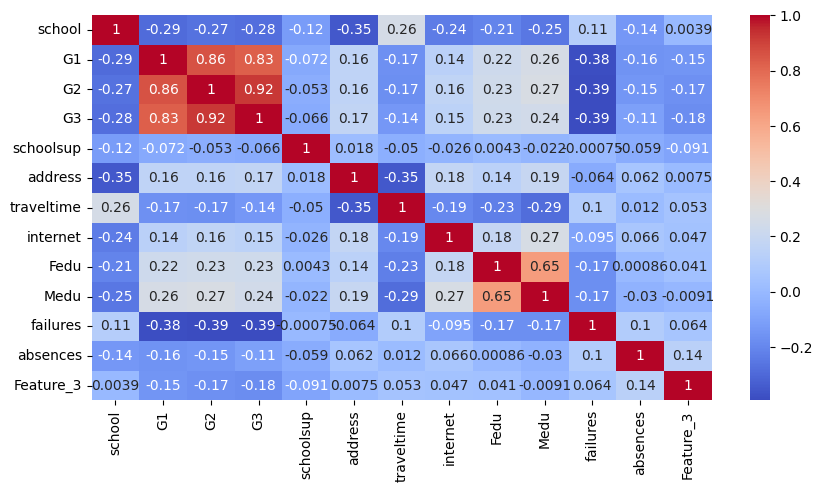

In [145]:
data_school = data_num[['school','G1','G2','G3','schoolsup','address','traveltime','internet','Fedu','Medu','failures','absences','Feature_3']].copy()
corr3=data_school.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr3, annot=True, cmap='coolwarm')
plt.show()


## 2) Is there any disparity between male and female students? ##

**Observations:**
- Males have comparitvely bad behaviour (Feature 3)
- Females have higher grades
- Females get more family and school support
- There is strong correlation between mother's education and sex(male). There are also more females going to school. This might mean that boys are only going to school when mother's are more educated.
- Females are generally less healthy

**Conclusions:**
- Yes, there is a disparity. Male students are underrepresented, and with no school and family support. Although females' health score is low, so schools should look on that.

**#JusticeforMen✊**


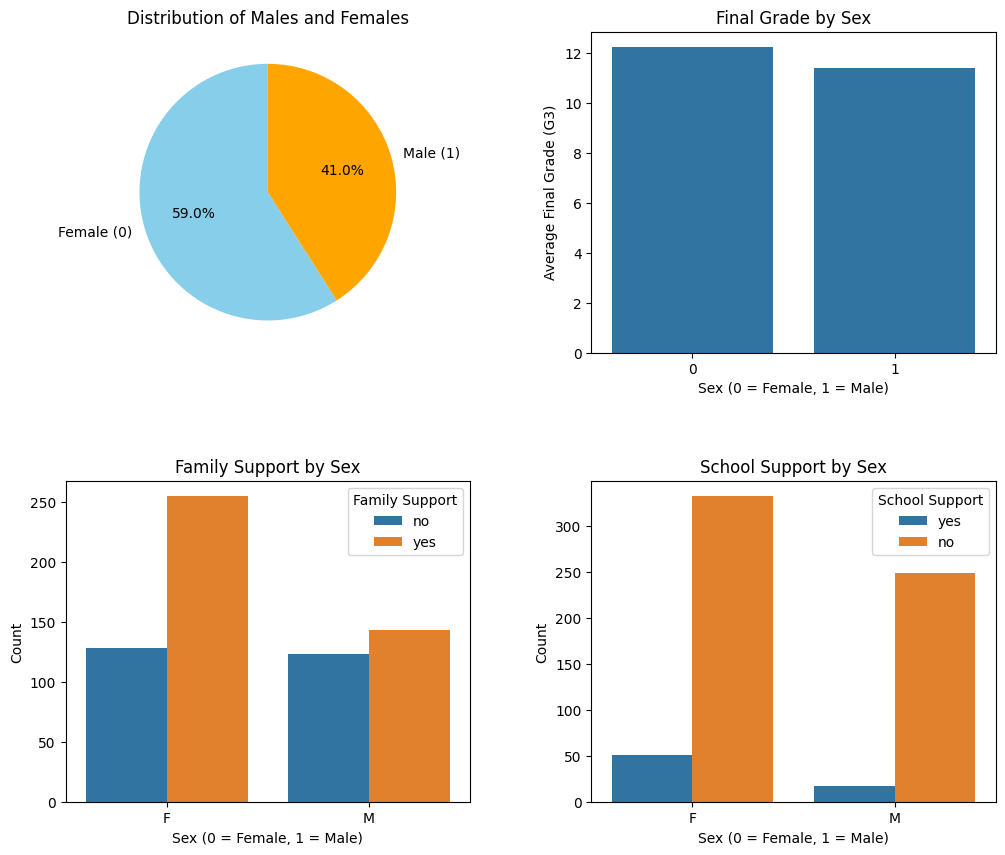

In [146]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

sex_counts = data_num['sex'].value_counts()
axs[0, 0].pie(sex_counts, labels=['Female (0)', 'Male (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
axs[0, 0].set_title("Distribution of Males and Females")

grade = data_num[['sex', 'G3']].groupby('sex').mean().reset_index()
sns.barplot(x='sex', y='G3', data=grade, ax=axs[0, 1])
axs[0, 1].set_title("Final Grade by Sex")
axs[0, 1].set_xlabel("Sex (0 = Female, 1 = Male)")
axs[0, 1].set_ylabel("Average Final Grade (G3)")

sns.countplot(x='sex', hue='famsup', data=data, ax=axs[1, 0])
axs[1, 0].set_title("Family Support by Sex")
axs[1, 0].set_xlabel("Sex (0 = Female, 1 = Male)")
axs[1, 0].set_ylabel("Count")
axs[1, 0].legend(title="Family Support")

sns.countplot(x='sex', hue='schoolsup', data=data, ax=axs[1, 1])
axs[1, 1].set_title("School Support by Sex")
axs[1, 1].set_xlabel("Sex (0 = Female, 1 = Male)")
axs[1, 1].set_ylabel("Count")
axs[1, 1].legend(title="School Support")

plt.show()

## 3) What all affects student's health? And how to improve it? ##

**Observations:**
- Some of the females are more unhealthy (Health index=2 or 3), although an average woman is as healthy as an average man
- Better family relations = better health

**Conclusions**
- Females in the lower health bracket should be checked upon
- Family relations affects health a lot, so a student should have good relations with his family members


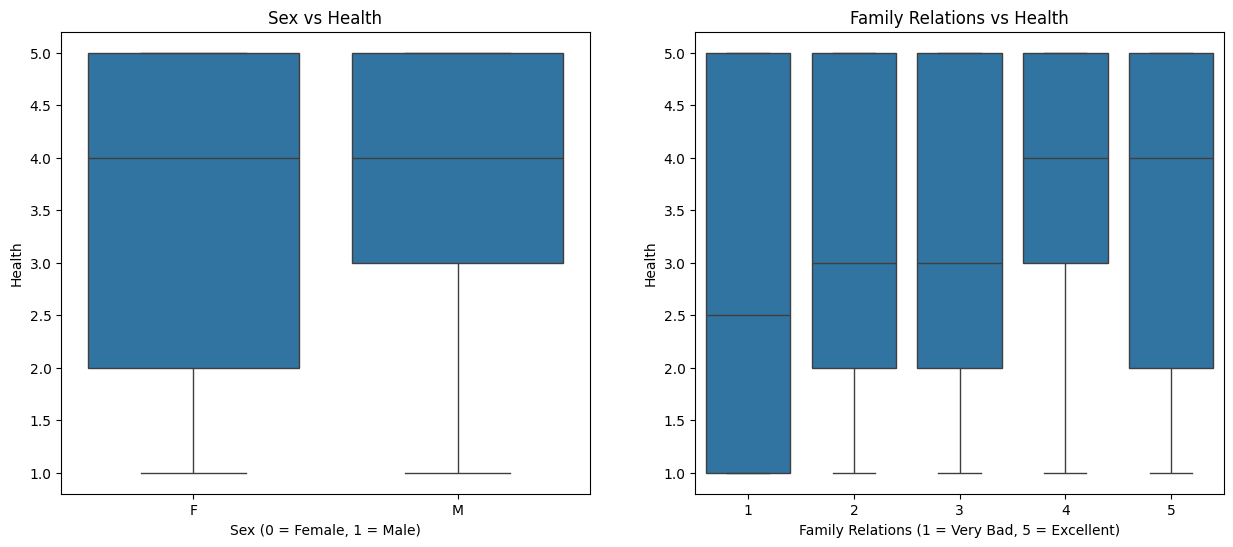

In [147]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='sex', y='health', data=data, ax=axs[0])
axs[0].set_title("Sex vs Health")
axs[0].set_xlabel("Sex (0 = Female, 1 = Male)")
axs[0].set_ylabel("Health")

sns.boxplot(x='famrel', y='health', data=data, ax=axs[1])
axs[1].set_title("Family Relations vs Health")
axs[1].set_xlabel("Family Relations (1 = Very Bad, 5 = Excellent)")
axs[1].set_ylabel("Health")

plt.show()

## 4) How does pstatus affect student's health, academics and social life? ##

Although there isn't a strong correlation between health, academics and social life, the following observations can be made:

**Observations:**
- Parental status doesn't determine health or academics
- But, there is a negative correlation between parental status and absences
- It also detrmines student's extra-curricular participation to some extent

**Conclusions**
- Parents should keep in mind their child's social life while seperating

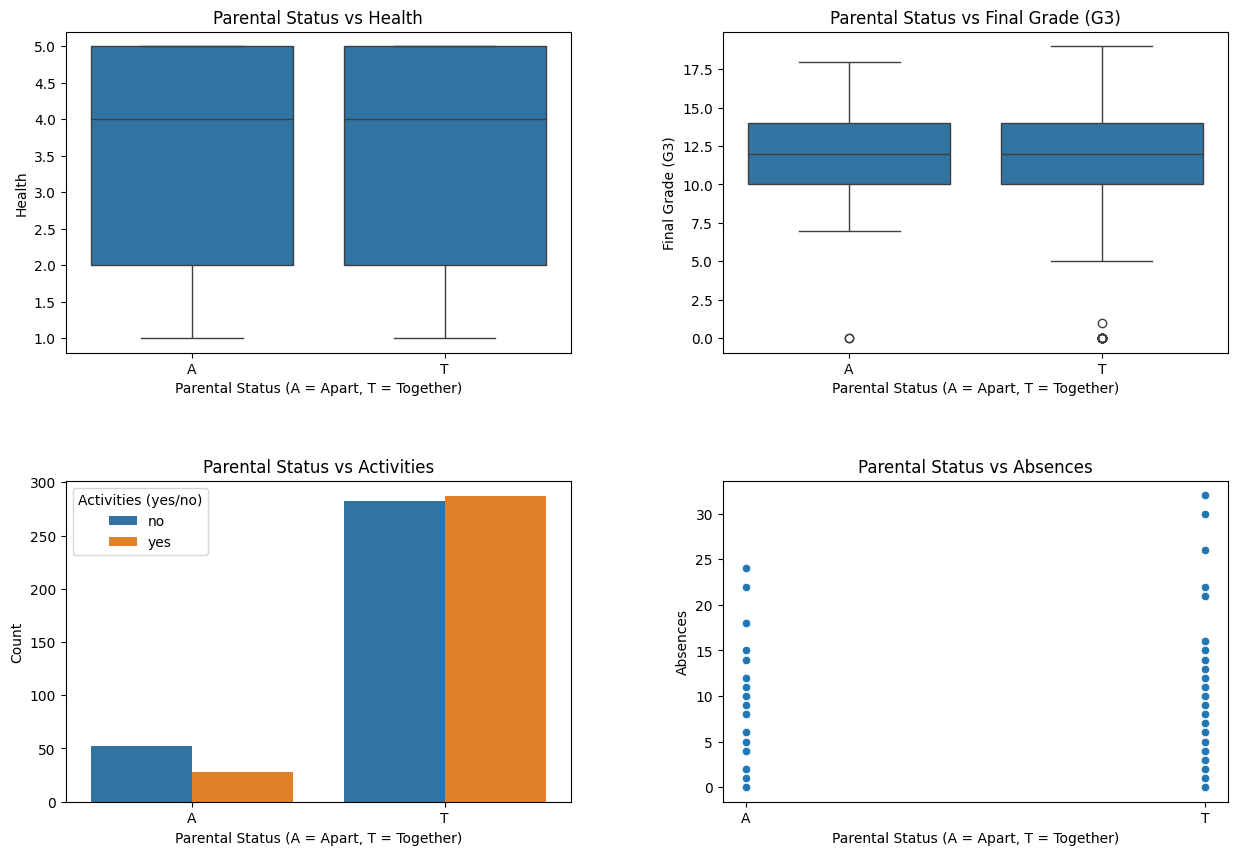

In [148]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

sns.boxplot(x='Pstatus', y='health', data=data, ax=axs[0, 0])
axs[0, 0].set_title("Parental Status vs Health")
axs[0, 0].set_xlabel("Parental Status (A = Apart, T = Together)")
axs[0, 0].set_ylabel("Health")

sns.boxplot(x='Pstatus', y='G3', data=data, ax=axs[0, 1])
axs[0, 1].set_title("Parental Status vs Final Grade (G3)")
axs[0, 1].set_xlabel("Parental Status (A = Apart, T = Together)")
axs[0, 1].set_ylabel("Final Grade (G3)")

sns.countplot(x='Pstatus', hue='activities', data=data, ax=axs[1, 0])
axs[1, 0].set_title("Parental Status vs Activities")
axs[1, 0].set_xlabel("Parental Status (A = Apart, T = Together)")
axs[1, 0].set_ylabel("Count")
axs[1, 0].legend(title="Activities (yes/no)")

sns.scatterplot(x='Pstatus', y='absences', data=data, ax=axs[1, 1])
axs[1, 1].set_title("Parental Status vs Absences")
axs[1, 1].set_xlabel("Parental Status (A = Apart, T = Together)")
axs[1, 1].set_ylabel("Absences")

plt.show()

## 5) Okay,now the big one : What all affects student's grades and then how to imporve school's grades? ##
*I'll only be comparing G3 as other two are highly highly correlated with it*


**Observations:**

- Absences affects the grades negatively (ignore high absences as they are relatively few and are outliers)
- Grades and health has a negative correlation
- Daily alcohol content also negatively impacts grades
- Intenet access also influences the grades
- Travel-time(already covered) and the guardian also affects the grade
- Other factors include reason for joining school, mother's and father's education(corr to medu), address (already covered), sex (already covered) and school (already covered)

**Conclusions:**

- If the mother or father is more educated, then the child gets better grades and thus the cycle continues, so parents and government should invest in education 
- Parent's should try to provide internet access to their children in order to get better grades
- And avoid alcohol, go to school regularly and be healthy to improve your grades :)


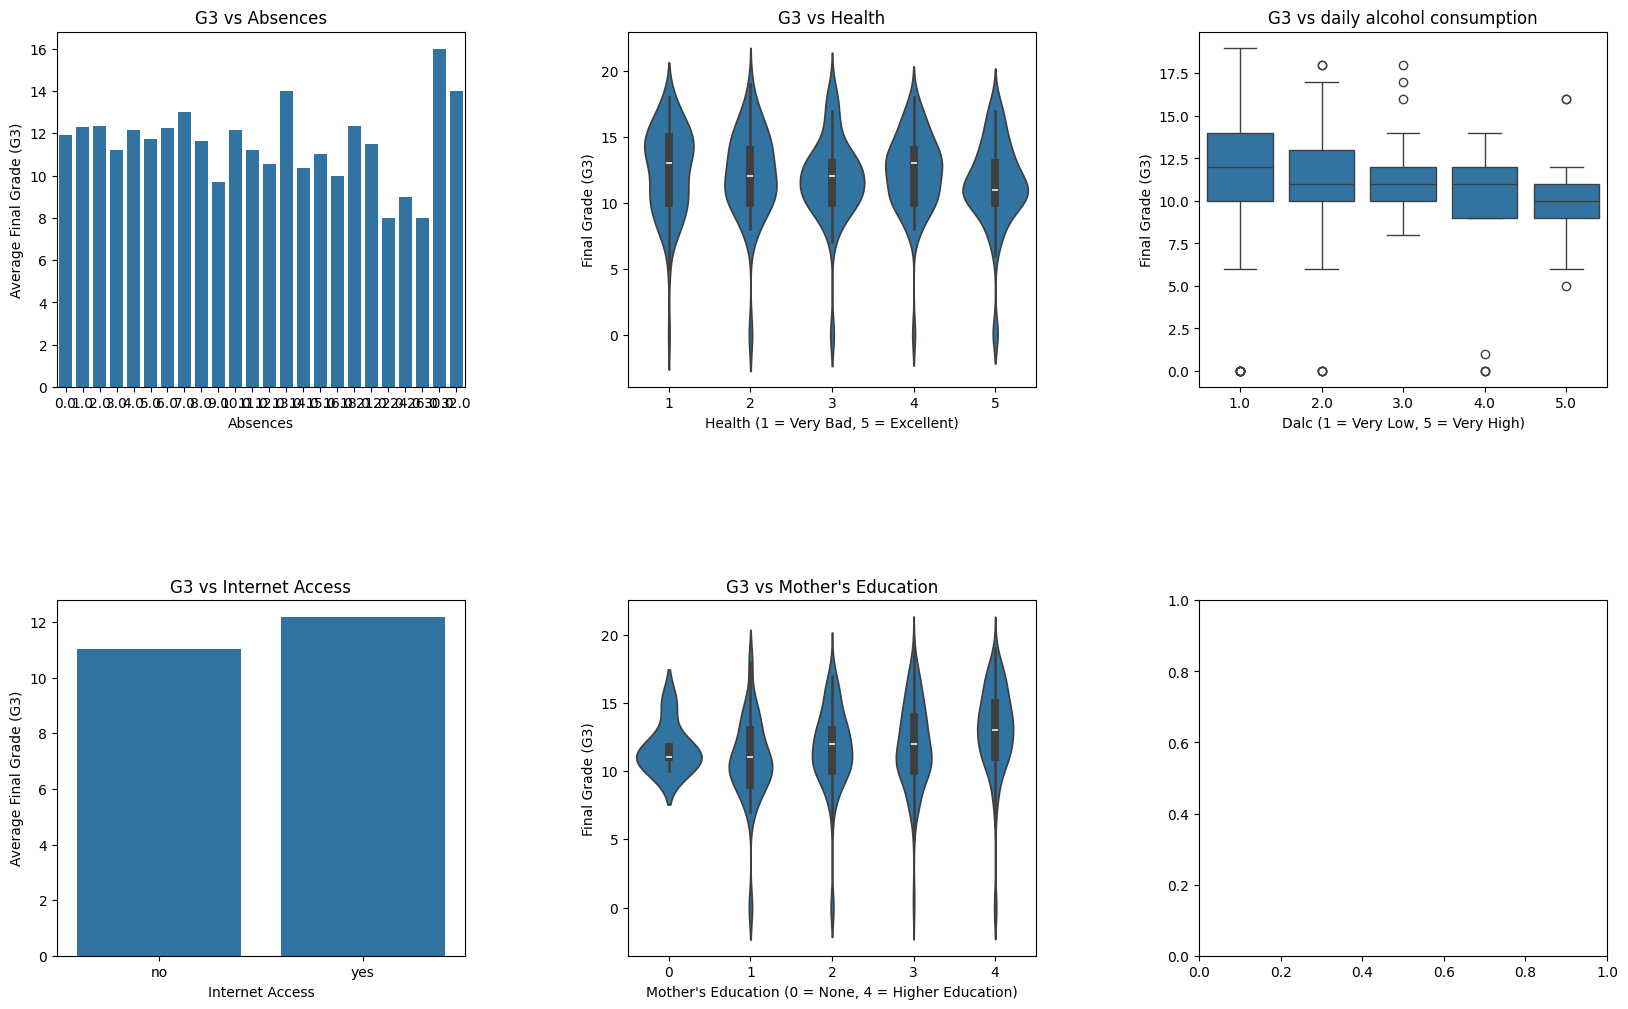

In [149]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

absences_avg = data.groupby('absences')['G3'].mean().reset_index()
sns.barplot(x='absences', y='G3', data=absences_avg, ax=axs[0, 0])
axs[0, 0].set_title("G3 vs Absences")
axs[0, 0].set_xlabel("Absences")
axs[0, 0].set_ylabel("Average Final Grade (G3)")

sns.violinplot(x='health', y='G3', data=data, ax=axs[0, 1])
axs[0, 1].set_title("G3 vs Health")
axs[0, 1].set_xlabel("Health (1 = Very Bad, 5 = Excellent)")
axs[0, 1].set_ylabel("Final Grade (G3)")

sns.boxplot(x='Dalc', y='G3', data=data, ax=axs[0, 2])
axs[0, 2].set_title("G3 vs daily alcohol consumption")
axs[0, 2].set_xlabel("Dalc (1 = Very Low, 5 = Very High)")
axs[0, 2].set_ylabel("Final Grade (G3)")

internet_avg = data.groupby('internet')['G3'].mean().reset_index()
sns.barplot(x='internet', y='G3', data=internet_avg, ax=axs[1, 0])
axs[1, 0].set_title("G3 vs Internet Access")
axs[1, 0].set_xlabel("Internet Access")
axs[1, 0].set_ylabel("Average Final Grade (G3)")

sns.violinplot(x='Medu', y='G3', data=data, ax=axs[1, 1])
axs[1, 1].set_title("G3 vs Mother's Education")
axs[1, 1].set_xlabel("Mother's Education (0 = None, 4 = Higher Education)")
axs[1, 1].set_ylabel("Final Grade (G3)")

plt.show()

## Level 4: Relationship Prediction Model ##

The factors on which it slightly depends:
- Feature_1, G2 (G1 and G3 too but they are *very* similar to G2, and G2 has the highest correlation, so not considering G1 and G3), absences, schoolsup, higher, guardian and sex

A logistic regression model should be good on this one as it have only binary values yes or no, but tried it and got only max 60% accuracy after trying out different combinations among them :(

In [150]:
le=LabelEncoder()
row_trans = [0,1,2,3,4,7,8,9,10,13,14,15,16,17,18,19,-1]
data_num2=data.copy()
for i in row_trans:
    data_num2.iloc[:,i] = le.fit_transform(data.iloc[:,i])

#print(data_num2['romantic'].isna().sum())


In [151]:

"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

features = ['Feature_1', 'G2', 'schoolsup', 'sex']
target = 'romantic'

X = data_num2[features]
y = data_num2[target]

# very important line, else it wouldn't work. Took up half an hour to figure out
y = y.astype(int) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#print(y_train.unique())

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
"""

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score\n\nfeatures = [\'Feature_1\', \'G2\', \'schoolsup\', \'sex\']\ntarget = \'romantic\'\n\nX = data_num2[features]\ny = data_num2[target]\n\n# very important line, else it wouldn\'t work. Took up half an hour to figure out\ny = y.astype(int) \n\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n\n#print(y_train.unique())\n\nmodel = LogisticRegression(max_iter=1000)\nmodel.fit(X_train, y_train)\n\ny_pred = model.predict(X_test)\n\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Accuracy: {accuracy}")\n'

Let's now try random forest, it is also for categorical outcomes....still got a 66.15% accuracy, yeah but highest till now

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

features = [ 'G2', 'absences', 'sex']
target = 'romantic'

X = data_num2[features]
y = data_num2[target]

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6615384615384615


Anyways, let's try linear regression after rounding(why not XD)....yeah again 60% :(

In [153]:
"""from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

features = ['Feature_1', 'G2', 'schoolsup', 'sex']
target = 'romantic'

X = data_num2[features]
y = data_num2[target]

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = np.round(model.predict(X_test)).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")"""

'from sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.model_selection import train_test_split\nimport numpy as np\n\nfeatures = [\'Feature_1\', \'G2\', \'schoolsup\', \'sex\']\ntarget = \'romantic\'\n\nX = data_num2[features]\ny = data_num2[target]\n\ny = y.astype(int)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nmodel = LinearRegression()\nmodel.fit(X_train, y_train)\n\ny_pred = np.round(model.predict(X_test)).astype(int)\n\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Accuracy: {accuracy}")'

I am a bit less on time, so wasn't able to read gridsearchcv :(

Yupp, so random forest gives the best (compared to others) accuracy which is 66.15%. But this isn't very effective. The input of random forest is grade, absences and sex:

- Sex is obvious as number of females are more in campus, so a female has a higher chance of being in a relationship
- But grades and absences might have happened **due to** relationship and not cause it. So if his grade is lower than some amount and absences is also greater than certain amount then one of the reasons causing it is that the student is in a relationship

So, this shows that if a student has absences > x and grades < y, then there is a good enough chance that relationship is behind it. So this tool might be helpful for teachers, if a female student is frequently absent and with low grades, then there is let's say around 70% chance that she is in a relationship and if we break up her from her boyfriend, then she might start scoring well. **#BajrangDal**